In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import functions.myfunctions as mf
from PairingVDJdb_MI import _define_individuals

In [2]:
save_folder1 = 'figures/'

In [3]:
vdj = pd.read_csv('data/vdj_cleaned_subset_for_MI.csv', index_col=0).drop('Unnamed: 0', axis=1)
vdj = vdj.replace('https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#', '10xGenomics')
vdj = vdj.replace('https://github.com/antigenomics/vdjdb-db/issues/*', 'GitHubIssue', regex=True)
vdj = vdj.loc[vdj['Epitope'] != 'KLGGALQAK'] # because too big - takes forever

In [4]:
counts = pd.DataFrame()


for epitope in vdj['Epitope'].unique():
    epdf = _define_individuals(vdj, epitope, 'no')
    epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
    N = epdf.shape[0]
    largest_id = epdf['subject-PMID'].value_counts().max()
    num_alpha = len(epdf['cdr3a_IMGTgaps_padded'].unique())
    num_beta = len(epdf['cdr3b_IMGTgaps_padded'].unique())

    counts.loc[epitope, 'N'] = N
    counts.loc[epitope, 'num_alpha'] = num_alpha
    counts.loc[epitope, 'num_beta'] = num_beta
    counts.loc[epitope, 'num_individuals'] = len(epdf['subject-PMID'].unique())
    counts.loc[epitope, 'largest_id'] = largest_id

    if N > 1000:
        for s in ['0','1','2','3','4']:
            df1 = pd.read_csv('data/big_epitopes_subsamples_700/' + epitope + '_ss' + s + '.csv')
            epdf = _define_individuals(df1, epitope, 'no')
            epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
            N = epdf.shape[0]
            largest_id = epdf['subject-PMID'].value_counts().max()
            num_alpha = len(epdf['cdr3a_IMGTgaps_padded'].unique())
            num_beta = len(epdf['cdr3b_IMGTgaps_padded'].unique())
            counts.loc[epitope + '_' + s, 'N'] = N
            counts.loc[epitope + '_' + s, 'num_alpha'] = num_alpha
            counts.loc[epitope + '_' + s, 'num_beta'] = num_beta
            counts.loc[epitope + '_' + s, 'num_individuals'] = len(epdf['subject-PMID'].unique())
            counts.loc[epitope + '_' + s, 'largest_id'] = largest_id

counts.to_csv(save_folder1 + 'cdr3_N_ID_counts_table.csv')

Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using individuals as provided
Using indi

In [5]:
counts.sort_index()

,N,num_alpha,num_beta,num_individuals,largest_id
ASNENMETM,201.0,157.0,111.0,28.0,23.0
ATDALMTGF,125.0,99.0,111.0,1.0,125.0
AVFDRKSDAK,1699.0,1552.0,1584.0,7.0,857.0
AVFDRKSDAK_0,700.0,661.0,670.0,7.0,361.0
AVFDRKSDAK_1,700.0,663.0,671.0,6.0,364.0
AVFDRKSDAK_2,700.0,657.0,662.0,5.0,338.0
AVFDRKSDAK_3,700.0,653.0,679.0,6.0,355.0
AVFDRKSDAK_4,700.0,657.0,672.0,6.0,347.0
CINGVCWTV,226.0,214.0,218.0,7.0,150.0
ELAGIGILTV,380.0,348.0,370.0,14.0,225.0


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


def simple_regplot(df,
    x, y, n_std=2, n_pts=100, ax=None, scatter_kws=None, line_kws=None, ci_kws=None
):
    """ Draw a regression line with error interval. """
    print(x, y)
    # ax = plt.gca() if ax is None else ax

    # calculate best-fit line and interval
    formula = y + ' ~ ' + ' + '.join(x)
    print(formula)
    formula = formula.strip(' +')
    fit_results = smf.ols(formula, data=df).fit()

    print(fit_results.summary())
    pval = fit_results.f_pvalue
    Rsq = fit_results.rsquared_adj
    if (pval<0.05):
        line_kws={'color':'red'}
        ci_kws={'color':'red'}
    else:
        line_kws={'color':'k'}
        ci_kws={'color':'k'}

    eval_x = pd.DataFrame(np.linspace(np.min(df[x]), np.max(df[x]), n_pts), columns=x)
    # print(eval_x)
    pred = fit_results.get_prediction(eval_x, transform=True)
    # print(pred.predicted_mean)

    # draw the fit line and 95% CI
    # ci_kws = {} if ci_kws is None else ci_kws
    # df_predictions = pred.summary_frame(alpha=0.05)
    # print(df_predictions)
    # for x1 in x:
    #     ax.fill_between(
    #         eval_x[x1],
    #         df_predictions.mean_ci_lower,
    #         df_predictions.mean_ci_upper,
    #         alpha=0.5,
    #         **ci_kws,
    #     )
    #     line_kws = {} if line_kws is None else line_kws
    #     h = ax.plot(eval_x[x1], pred.predicted_mean, **line_kws, label = x1)

    #     # draw the scatterplot
    #     scatter_kws = {} if scatter_kws is None else scatter_kws
    #     ax.scatter(df[x1], df[y], c=h[0].get_color())#, **scatter_kws)
    # plt.legend()
    # plt.show()
    return pval, Rsq

/tmp/ipykernel_178806/4238171536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts1['epitope'] = [x.split('_')[0] for x in counts1.index]
/home/marti/miniconda3/envs/MutualInformation/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/marti/miniconda3/envs/MutualInformation/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axi

                N  num_alpha  num_beta  num_individuals  largest_id
epitope                                                            
ASNENMETM   201.0      157.0     111.0             28.0        23.0
ATDALMTGF   125.0       99.0     111.0              1.0       125.0
AVFDRKSDAK  700.0      658.2     670.8              6.0       353.0
CINGVCWTV   226.0      214.0     218.0              7.0       150.0
ELAGIGILTV  380.0      348.0     370.0             14.0       225.0
GILGFVFTL   700.0      478.2     437.6             48.4       292.6
GLCTLVAML   345.0      228.0     239.0             20.0       113.0
HGIRNASFI   243.0      187.0     180.0             13.0        64.0
IVTDFSVIK   704.0      526.0     517.0              7.0       282.0
KSKRTPMGF   103.0       85.0      70.0              1.0       103.0
LLWNGPMAV   235.0      202.0     220.0              2.0       187.0
LSLRNPILV   127.0      109.0     111.0             12.0        20.0
LTDEMIAQY   124.0      115.0     119.0          

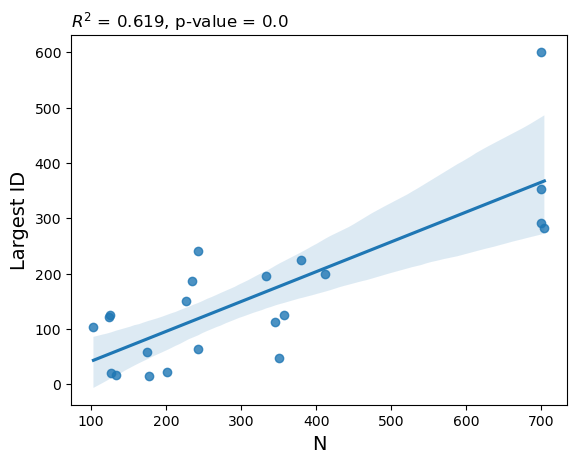

In [7]:
counts1 = counts.loc[~counts.index.isin(['AVFDRKSDAK', 'GILGFVFTL', 'RAKFKQLL'])]
counts1['epitope'] = [x.split('_')[0] for x in counts1.index]
counts1 = counts1.groupby('epitope').mean()
print(counts1)

p,R = simple_regplot(counts1, ['N'], 'largest_id')
ax = sns.regplot(data=counts1, x = 'N', y = 'largest_id', x_ci='ci', ci=95)
ax.set_ylabel('Largest ID', fontsize = 14)
ax.set_xlabel('N', fontsize = 14)
plt.title(r'$R^2$ = ' + str(R.round(3)) + ', p-value = ' + str(p.round(3)), loc='left')

plt.savefig(save_folder1 + 'N_largestID_corr.png')
plt.show()